In [9]:
from langchain.chat_models import ChatOpenAI
from langchain.agents import initialize_agent, AgentType
from langchain.prompts import PromptTemplate 
from tools.song_getter import *
from functions.coloured_image_generator import create_image_from_dictionary

# Run an agent

In [3]:
# Create llm
llm = ChatOpenAI(openai_api_key = 'OPENAI_API_KEY_HERE', temperature = 0, max_tokens = 2056)

# List the tools that Agent can use (basic for now)
tools = [song_getter]

# Set up the Agent, give it the tools
agent = initialize_agent(tools,
                         llm,
                         agent = AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,
                         verbose = True)

# Create the prompt template for the Agent to start off with
prompt = PromptTemplate(
          template = """            
          You are an AI assistant who's goal is to colour each chord in clean data and return it in a Python dictionary format. You have been given access to tools that can: \n 
          - Create urls to mychordbook.com and get unclean chord sheet data from mychordbook.com, clean it and then colour it and return it in a Python dictionary format

          Given this please do the following: \n
          Get and colour the appropriate mychordbook.com url for the song {song_name} by {artist_name}

          When this is done end the chain and return the coloured cleaned chord sheet data
           """,
           input_variables = ['song_name', 'artist_name']                                                             
        )

# Fill in the prompt template with the song and artist
prepared_prompt = prompt.format_prompt(song_name = 'fly me to the moon', artist_name = 'frank sinatra')

# Run the Agent with the provided input variables
output = agent.run(prepared_prompt)



> Entering new AgentExecutor chain...
Action:
```
{
  "action": "song_getter",
  "action_input": {
    "song_name": "fly me to the moon",
    "artist_name": "frank sinatra"
  }
}
```

Observation: {'verse': [('A', 'min', 'o', '7', 'c', 'b'), ('D', 'min', 'g', '7', 'c', 'r'), ('G', 'dom', 'p', '7', 'c', 'y'), ('C', 'maj', 'o', '7', 'c', 'b'), ('F', 'maj', 'g', '', '', ''), ('D', 'min', 'g', '', '', ''), ('E', 'maj', 'p', '', '', ''), ('A', 'min', 'o', '', '', ''), ('A', 'dom', 'o', '7', 'c', 'b')], 'chorus': [('D', 'min', 'g', '7', 'c', 'r'), ('G', 'dom', 'p', '7', 'c', 'y'), ('C', 'maj', 'o', '', '', ''), ('A', 'min', 'o', '', '', ''), ('D', 'min', 'g', '7', 'c', 'r'), ('G', 'dom', 'p', '7', 'c', 'y'), ('C', 'maj', 'o', '', '', ''), ('E', 'maj', 'p', '', '', '')], 'verse_1': [('A', 'min', 'o', '', '', ''), ('D', 'min', 'g', '7', 'c', 'r'), ('G', 'dom', 'p', '7', 'c', 'y'), ('C', 'maj', 'o', '7', 'c', 'b'), ('F', 'maj', 'g', '', '', ''), ('D', 'min', 'g', '7', 'c', 'r'), ('E', 'maj', 

# Convert the agent output into a dictionary for further processing

In [13]:
dict_output = string_to_dictionary(output)
dict_output

{'verse': [('A', 'min', 'o', '7', 'c', 'b'),
  ('D', 'min', 'g', '7', 'c', 'r'),
  ('G', 'dom', 'p', '7', 'c', 'y'),
  ('C', 'maj', 'o', '7', 'c', 'b'),
  ('F', 'maj', 'g', '', '', ''),
  ('D', 'min', 'g', '', '', ''),
  ('E', 'maj', 'p', '', '', ''),
  ('A', 'min', 'o', '', '', ''),
  ('A', 'dom', 'o', '7', 'c', 'b')],
 'chorus': [('D', 'min', 'g', '7', 'c', 'r'),
  ('G', 'dom', 'p', '7', 'c', 'y'),
  ('C', 'maj', 'o', '', '', ''),
  ('A', 'min', 'o', '', '', ''),
  ('D', 'min', 'g', '7', 'c', 'r'),
  ('G', 'dom', 'p', '7', 'c', 'y'),
  ('C', 'maj', 'o', '', '', ''),
  ('E', 'maj', 'p', '', '', '')],
 'verse_1': [('A', 'min', 'o', '', '', ''),
  ('D', 'min', 'g', '7', 'c', 'r'),
  ('G', 'dom', 'p', '7', 'c', 'y'),
  ('C', 'maj', 'o', '7', 'c', 'b'),
  ('F', 'maj', 'g', '', '', ''),
  ('D', 'min', 'g', '7', 'c', 'r'),
  ('E', 'maj', 'p', '', '', ''),
  ('A', 'min', 'o', '', '', ''),
  ('A', 'dom', 'o', '7', 'c', 'b')],
 'chorus_1': [('D', 'min', 'g', '7', 'c', 'r'),
  ('G', 'dom', 'p',

# Get the secondary and extension colours from the output then create an image of the coloured chords

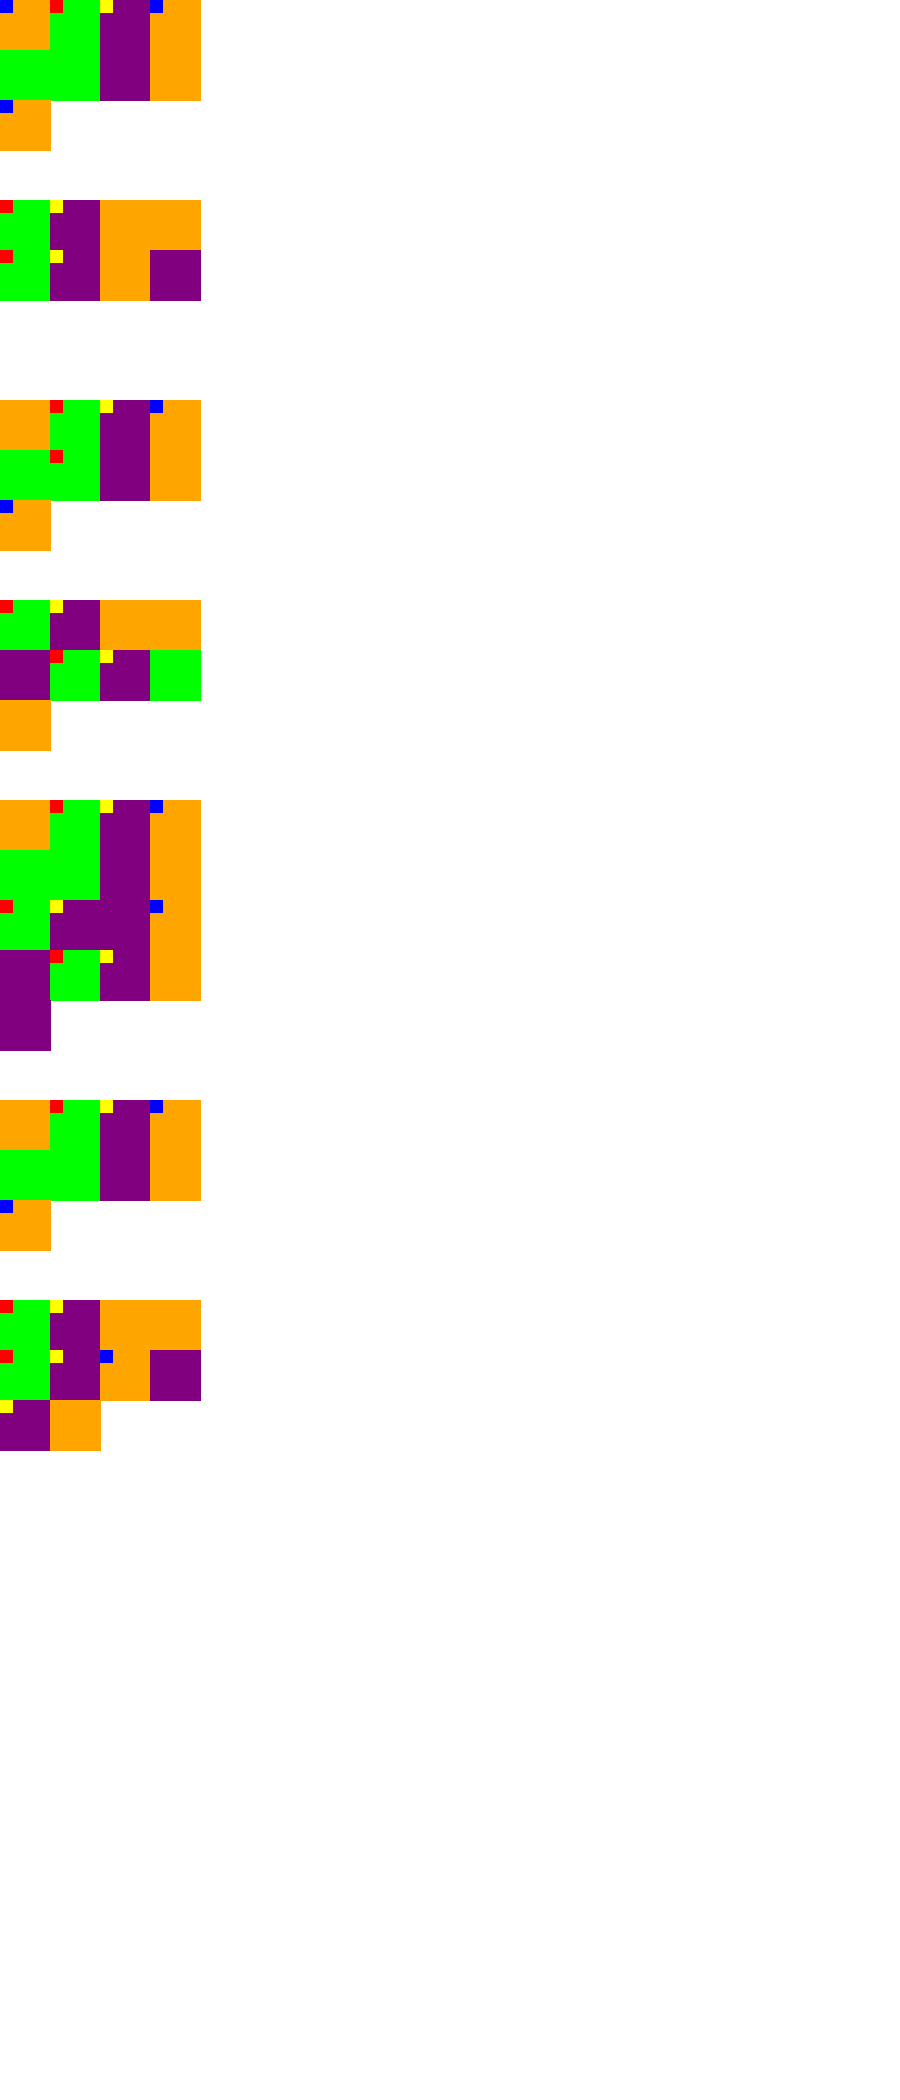

In [17]:
secondary_colours = {key: [value[2] for value in values] for key, values in dict_output.items()}
extension_colours = {key: [value[5] for value in values] for key, values in dict_output.items()}

image = create_image_from_dictionary(secondary_colours, extension_colours)
image